# Capstone: Airbnb Price Listing Prediction
## Part 3 Feature Engineering & Model Benchmark

_Authors: Evonne Tham_

##  1. Import Necessary Libraries & Load Data 

<div class="alert alert-block alert-info">
    
<b>Model Selection - fixed learning method</b>

- Split the data into train, test, and validation.
- Train as many models as there are hyperparameter combinations on the train set.
- Evaluate each of these models on the validation set.
- Select the model with the best performance on the validation set.
- Retrain the model on the combined train + validation sets using 'winning' hyperparameter combination.
- Estimate generalisation performance on the test set. If the test error is similar to the validation error then we have belief that this model will generalise well to unseen data.
- Finally retrain the model with the choosen hyperparameters on the entire set before production.

<b>Algorithm Selection</b>

We can follow the above reasoning but split the data into independent train, validation, test sets for each learning method we are testing.
This obviously only works if we have a large amount of data at our disposal.

</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.dummy import DummyRegressor

# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, accuracy_score
# import xgboost as xgb
# from xgboost import plot_importance


#Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in Data 
df = pd.read_csv('../datasets/final_df.csv')
print(f"Total Number of Listing: {df.shape[0]} | Total Number of Features: {df.shape[1]}")
df.head().T

Total Number of Listing: 11435 | Total Number of Features: 46


0  \
id                                                                       35303   
host_id                                                                 151977   
host_since                                                          2010-06-25   
host_response_time                                                     unknown   
host_response_rate                                                     unknown   
host_acceptance_rate                                                   unknown   
host_is_superhost                                                            0   
host_listings_count                                                          3   
host_identity_verified                                                       1   
neighbourhood                                                       Shibuya Ku   
country_code                                                                JP   
latitude                                                               35.6715   
longitude                                                              139.712   
is_location_exact                                                            1   
property_type                                                        Apartment   
room_type                                                         private_room   
accommodates                                                                 1   
bathrooms                                                                    1   
bedrooms                                                                     1   
beds                                                                         1   
amenities                    tv,internet,wifi,kitchen,paid parking off prem...   
price                                                                     4192   
security_deposit                                                         30000   
cleaning_fee                                                              5000   
guests_included                                                              1   
extra_people                                                                 0   
minimum_nights                                                              28   
maximum_nights                                                            1125   
calendar_updated                                                 19 months ago   
availability_30                                                             29   
availability_60                                                             59   
availability_90                                                             89   
availability_365                                                            89   
number_of_reviews                                                           18   
first_review                                                        2011-12-28   
last_review                                                         2018-07-28   
review_scores_rating                                                    90-99%   
review_scores_accuracy                                                       9   
review_scores_cleanliness                                                    9   
review_scores_checkin                                                        9   
review_scores_communication                                                 10   
review_scores_location                                                      10   
review_scores_value                                                          9   
instant_bookable                                                             0   
cancellation_policy                                                     strict   
time_since_first_review                           2404 days 00:00:00.000000000   

                                                                             1  \
id                                                                      197677   
host_id                                                   

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.dummy import DummyRegressor

# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, accuracy_score
# import xgboost as xgb
# from xgboost import plot_importance


#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Load in Data 
df = pd.read_csv('../datasets/final_df.csv')
print(f"Total Number of Listing: {df.shape[0]} | Total Number of Features: {df.shape[1]}")
df.head().T

Total Number of Listing: 11435 | Total Number of Features: 46


0  \
id                                                                       35303   
host_id                                                                 151977   
host_since                                                          2010-06-25   
host_response_time                                                     unknown   
host_response_rate                                                     unknown   
host_acceptance_rate                                                   unknown   
host_is_superhost                                                            0   
host_listings_count                                                          3   
host_identity_verified                                                       1   
neighbourhood                                                       Shibuya Ku   
country_code                                                                JP   
latitude                                                               35.6715   
longitude                                                              139.712   
is_location_exact                                                            1   
property_type                                                        Apartment   
room_type                                                         private_room   
accommodates                                                                 1   
bathrooms                                                                    1   
bedrooms                                                                     1   
beds                                                                         1   
amenities                    tv,internet,wifi,kitchen,paid parking off prem...   
price                                                                     4192   
security_deposit                                                         30000   
cleaning_fee                                                              5000   
guests_included                                                              1   
extra_people                                                                 0   
minimum_nights                                                              28   
maximum_nights                                                            1125   
calendar_updated                                                 19 months ago   
availability_30                                                             29   
availability_60                                                             59   
availability_90                                                             89   
availability_365                                                            89   
number_of_reviews                                                           18   
first_review                                                        2011-12-28   
last_review                                                         2018-07-28   
review_scores_rating                                                    90-99%   
review_scores_accuracy                                                       9   
review_scores_cleanliness                                                    9   
review_scores_checkin                                                        9   
review_scores_communication                                                 10   
review_scores_location                                                      10   
review_scores_value                                                          9   
instant_bookable                                                             0   
cancellation_policy                                                     strict   
time_since_first_review                           2404 days 00:00:00.000000000   

                                                                             1  \
id                                                                      197677   
host_id                                                   

---
## 2. Feature Engineering 

##### a. Categorical Variables

In [4]:
df = pd.get_dummies(df, columns=['property_type',
                                 'room_type',
                                 'cancellation_policy',
                                 'neighbourhood',
                                 'host_response_time',
                                 'host_acceptance_rate',
                                 'review_scores_rating',
                                 'review_scores_accuracy',
                                 'review_scores_cleanliness',
                                 'review_scores_checkin',
                                 'review_scores_communication',
                                 'review_scores_location',
                                 'review_scores_value',
                                 'instant_bookable',
                                 'is_location_exact'
                                ], 
                         drop_first = False)

##### b. Amenities

In [5]:
all_amenities = df['amenities'].str.get_dummies(sep=',')
df = pd.concat([df, all_amenities], axis=1)

print(f"Total Number of Listing: {df.shape[0]} | Total Number of Features: {df.shape[1]}")

Total Number of Listing: 11435 | Total Number of Features: 324


NameError: name 'ax' is not defined

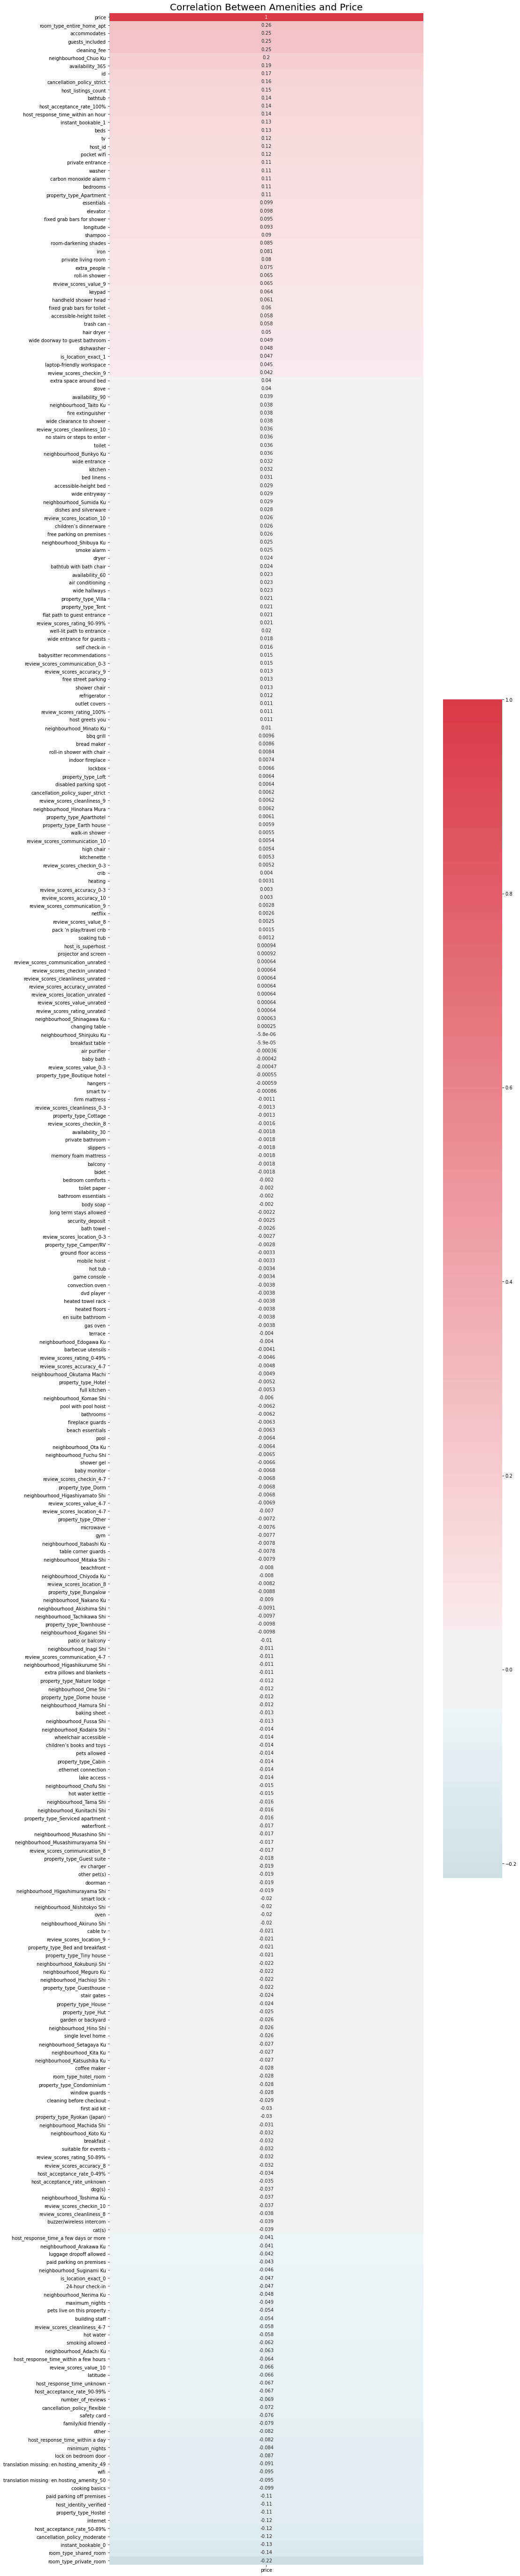

In [6]:
fig = plt.figure(figsize=(15,100))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df.corr()

sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), 
            cmap=cmap, 
            center=0, 
            annot=True,
            cbar_kws={"shrink": .9},)

plt.title('Correlation Between Amenities and Price', fontsize=20)
y_min, y_max = ax.get_ylim() 
x_min, x_max = ax.get_xlim()
ax.set_ylim(top=y_max+1) 
ax.set_xlim(right=x_max-1);

---
## 3. Multicollinearity

In [ ]:
sns.set(style="white")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30,30))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

ax.set_title('Collinearity between Features', fontsize=30);

---
##  3. Model Prep

##### i. Create X and y variables

In [ ]:
features = [col for col in df._get_numeric_data().columns if col != 'price']

X = df[features]
y = df['price']

#####  ii. Baseline Prediction 

In [ ]:
print(f'The mean value of the target vector is: {np.mean(y)}.')

<div class="alert alert-block alert-info">

<b>Observation:</b> Without any regression modelling, the predicted value for every data point is 17990Â¥.

</div>

##### iii. Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

##### iv. Baseline score

In [ ]:
dummy_constant = DummyRegressor(strategy='constant', constant = 17990.367118495848 )
dummy_constant.fit(X_train_ss, y_train)
print(f'R2 score for baseline model: {dummy_constant.score(X_train_ss, y_train)}.')

<div class="alert alert-block alert-info">

<b>Observation:</b> This is a bad r2 score as it indicates that the baseline model explains basically none of the variability of the response data around its mean.

</div>

In [ ]:
# Instantiate Regression Models

lr = LinearRegression()

lasso = LassoCV(n_alphas=200)

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas = 100)


In [ ]:
# Conduct a K Fold cross validation for Models 
# The bigger the score the better the model.

print("Accuracy of Linear Regression Model with Cross-Validation: {}".format(cross_val_score(lr, 
                                                                                             X_train_ss, 
                                                                                             y_train, 
                                                                                             cv=5, 
                                                                                             scoring='r2').mean()))
print('*********************************************************************************')

print("Accuracy of Lasso Model with Cross-Validation: {}".format(cross_val_score(lasso, 
                                                                                 X_train_ss, 
                                                                                 y_train, 
                                                                                 cv=5, 
                                                                                 scoring='r2').mean()))
print('*********************************************************************************')

print("Accuracy of Ridge Model with Cross-Validation: {}".format(cross_val_score(ridge, 
                                                                                 X_train_ss, 
                                                                                 y_train, 
                                                                                 cv=5, 
                                                                                 scoring='r2').mean()))
print('*********************************************************************************')

print("Accuracy of Elastic Net Model with Cross-Validation: {}".format(cross_val_score(enet, 
                                                                                       X_train_ss,
                                                                                       y_train, 
                                                                                       cv=5, 
                                                                                       scoring='r2').mean()))

print('')
print('Cross Validation Completed!')

--- 
##  4. GridSearch

In [ ]:
def grid_modeller_val_scorer(regressor): 
    
    '''
    
    Hyperparameter tuning that takes arguments "knn", "rf", "gb", "xgb" "svc"
    
    '''
    
    #all 5 regressor models correspond respectively to these 5 instantiated models:
    lr = LinearRegression()
    lasso = LassoCV()
    ridge = RidgeCV()
    enet = ElasticNetCV()
    knn = KNeighborsRegressor()
    rf  = RandomForestRegressor()
    gb = GradientBoostingRegressor()
    xgb = XGBRegressor()
    
    if regressor == "knn":
        pipe_knn = Pipeline([('scaler', RobustScaler()), 
                             ('knn', knn)])
        
        param_grid_knn = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'knn__p': [1, 2],
                          'knn__leaf_size': [10, 20, 30, 40, 50]}

        gs = GridSearchCV(pipe_knn, 
                          param_grid_knn, 
                          cv=5, 
                          n_jobs=-1, 
                          verbose=1, 
                          scoring = "r2") 
        
        gs.fit(X_train_ss, y_train)
    
    elif regressor == "rf":
        
        #run grid search on Random Forest params:
        param_grid_rf  = [{'n_estimators': [10, 50, 100, 250, 500, 1000],
                           'min_samples_leaf': [1, 3, 5],
                           'max_features': ['sqrt', 'log2'], 
                           'class_weight':[{0: w} for w in [1, 2, 4, 6, 10]]}] 
                            #another class re-weighting attempt
    
        gs = GridSearchCV(rf, 
                          param_grid_rf, 
                          cv=5, 
                          n_jobs=-1, 
                          verbose=1, 
                          scoring = "r2") 
        
        gs.fit(X_train_ss, y_train)
                            
    elif regressor == "gb":
        
        #create Gradient Boosting pipeline:
        pipe_gb = Pipeline([('scaler', RobustScaler()),
                            ("gb", gb)])
        
        #run grid search on Gradient Boosting Params
        param_grid_gb = [{'gb__max_depth': [2,3,4,5],
                          'gb__n_estimators': [100, 125, 150, 200],
                          'gb__learning_rate': [.08, .1, .12]}]
    
        gs = GridSearchCV(pipe_gb, 
                          param_grid_gb, 
                          cv=5, 
                          n_jobs=-1, 
                          verbose=1,
                          scoring = "r2") 
        
        gs.fit(X_train_ss, y_train)
    
    elif regressor == "xgb":
        
        #create Gradient Boosting pipeline:
        pipe_xgb = Pipeline([('scaler', RobustScaler()),
                             ("xgb", xgb)])
        
        #run grid search on Xtreme Gradient Boosting Params
        param_grid_xgb = [{'xgb__max_depth': [2,3,4,5,6,7,8,9,10],
                           'xgb__n_estimators': [100, 125, 150, 200, 250],
                           'xgb__learning_rate': [.1, .01, .05],
                           'xgb__scale_pos_weight':list(range(18,52,2))}]
                        
        gs = GridSearchCV(pipe_xgb, 
                          param_grid_xgb, 
                          cv=5, 
                          n_jobs=-1, 
                          verbose=1,
                          scoring = "r2") 
        
        gs.fit(X_train_ss, y_train)
                            
    elif regressor == "svc":
        
        #create SVM pipeline for classification and scaling
        pipe_svm = Pipeline([('scaler', RobustScaler()),
                             ("svc", svc)])
        
        #run grid search on SVC paramaters
        param_grid_svm = {"svc__C":[1,10], "clf_svc__gamma":[0.001, 0.01, 0.1, 1], 
                          "svc__kernel":('linear', 'rbf','sigmoid','poly')}  
        
        gs = GridSearchCV(pipe_svm, 
                          param_grid_svm, 
                          cv=5, 
                          n_jobs=-1,
                          verbose=1,
                          scoring = "r2") 
        
        gs.fit(X_train_ss, y_train)

    
    
    
    #get scores
    train_score = gs.score(X_train_ss, y_train)
    val_score = gs.score(X_val, y_val)
        
    #get confusion matrix and classification metrics
    y_pred = gs.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    cm_df = pd.DataFrame(cm, columns=["pred_WNV","pred_no_WNV"], index=["actual_WNV","actual_no_WNV"])
        
#     #get ROC AUC and F1 Score
#     auc = roc_auc_score(y_val, y_pred)
#     f1_score = metrics.f1_score(y_val, y_pred)
#     precision = metrics.precision_score(y_val, y_pred)
#     recall = metrics.recall_score(y_val, y_pred)
    
    metrics_list= [train_score, val_score, gs.best_score_, auc, f1_score, precision, recall]

    
    #print out accuracy, estimator and parameters from GridSearchCV
    print(f'best train accuracy score = {train_score}')
    print(f'best validation accuracy score = {val_score}')
    print(f'best grid search score = {gs.best_score_}')
    print(f'ROC AUC score = {auc}')
    print(f'f1_score={f1_score}')
    print(f"Precision - ability not to label as positive a sample that is negative = {precision}")
    print(f"Sensitivity or Recall - ability to find all the positive samples = {recall}")
    print(f'best estimator = {gs.best_estimator_}')
    print(f'best parameters = {gs.best_params_}')
    print(f"metrics list for {classifier}:", metrics_list)

    #prints confusion matrix
    return cm_df

----> Proceed to the next notebook for Model Evaluation

##  <span style='background:yellow'> 1. Import Necessary Libraries & Load Data </span>  --- to break notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# # modelling
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import StandardScaler, MinMaxScaler 
# from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# from sklearn.dummy import DummyRegressor

# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, accuracy_score
# import xgboost as xgb
# from xgboost import plot_importance


#Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load in Data 
df = pd.read_csv('../datasets/final_df.csv')
print(f"Total Number of Listing: {df.shape[0]} | Total Number of Features: {df.shape[1]}")
df.head().T

--- 
## 2. Model Evaluation

The evaluation metrics used will be mean squared error (for loss) and r squared (for accuracy).